In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('/content/TC_Data.xlsx')
print(df.head())

  OrderID CustomerID ProductID  OrderDate  Quantity  UnitPrice  Revenue  \
0  O00001      C2579     P0096 2023-07-04       2.0     336.51   673.02   
1  O01736      C0044     P0096 2023-07-26       5.0     336.51  1682.55   
2  O02723      C0019     P0001 2023-01-08       4.0     372.07  1488.28   
3  O00765      C0452     P0001 2023-05-28       1.0     372.07   372.07   
4  O00045      C1269     P0001 2023-10-21       5.0     372.07  1860.35   

   PaymentMode DeliveryStatus    Month  ...   Price Retruned Qty  \
0          UPI       Returned     July  ...  336.51            2   
1       Wallet        Pending     July  ...  336.51            0   
2       Wallet       Returned  January  ...  372.07            4   
3  Net Banking       Returned      May  ...  372.07            1   
4  Net Banking        Pending  October  ...  372.07            0   

   Returned Order Count Refunded Amount Age category Discount Category Month2  \
0                     1          673.02        Adult  Very 

In [ ]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

daily_revenue = df.groupby(df['OrderDate'].dt.date)['Revenue'].sum()

df['Week'] = df['OrderDate'].dt.isocalendar().week
weekly_revenue = df.groupby(df['Week'])['Revenue'].sum()

print("Daily Revenue Trend:")
print(daily_revenue)
print("\nWeekly Revenue Trend:")
weekly_revenue


Daily Revenue Trend:
OrderDate
2023-01-01    14236.34
2023-01-02    23611.12
2023-01-03    17058.18
2023-01-04    26943.93
2023-01-05    20294.47
                ...   
2023-12-28    11600.55
2023-12-29    17566.60
2023-12-30    16450.16
2023-12-31    29749.31
2024-01-01    18329.59
Name: Revenue, Length: 366, dtype: float64

Weekly Revenue Trend:


,Revenue
Week,
1,171976.04
2,138709.25
3,141969.20
4,119355.64
5,142980.98
6,130021.80
7,147042.69
8,133062.79
9,144493.43


In [ ]:
print(df.columns.tolist())

['OrderID', 'CustomerID', 'ProductID', 'OrderDate', 'Quantity', 'UnitPrice', 'Revenue', 'PaymentMode', 'DeliveryStatus', 'Month', 'TCCustomer.CustomerID', 'Customer Name', 'Customer Age', 'Customer Gender', 'Customer Region', 'TCProduct.ProductID', 'Product Name', 'Product Category', 'Actual Price', 'Discount', 'Price', 'Retruned Qty', 'Returned Order Count', 'Refunded Amount', 'Age category', 'Discount Category', 'Month2', 'Month (T)', 'Campaign', 'Net Revenue ', 'Week']


In [ ]:
discount_by_product = df.groupby('Product Name')['Discount'].mean().reset_index()
discount_by_product

,Product Name,Discount
0,Ability Ball,0.70
1,Admit Ball,0.25
2,Agency Gadget,0.70
3,Alone Ball,0.70
4,Already Ball,0.15
...,...,...
192,Wide Shirt,0.10
193,Wife Lamp,0.20
194,Wind Cream,0.10
195,Window Cream,0.40


In [ ]:
#What is the correlation between discount and quantity sold?

correlation = df['Discount'].corr(df['Quantity'])
print(f"Correlation between Discount and Order Quantity: {correlation}")

Correlation between Discount and Order Quantity: -0.0031152267057576294


In [ ]:
# Which regions have the highest refund rates?

region_order_counts = df.groupby('Customer Region')['OrderID'].count()
region_refund_counts = df[df['DeliveryStatus'] == 'Returned'].groupby('Customer Region')['OrderID'].count()


region_refund_rates = (region_refund_counts / region_order_counts) * 100


region_refund_rates_sorted = region_refund_rates.sort_values(ascending=False)

print("Refund Rates by Region:")
region_refund_rates_sorted


Refund Rates by Region:


,OrderID
Customer Region,
North,33.695652
Central,32.940020
West,32.669903
East,32.479848
South,31.152815


In [ ]:
# What are the top 10 products by revenue?


df['Product Net Revenue'] = df['Quantity'] * df['Price'] * (1 - df['Discount'])


product_revenue = df.groupby('Product Name')['Product Net Revenue'].sum()

top_10_products_by_revenue = product_revenue.sort_values(ascending=False).head(10)

print("\nTop 10 Products by Revenue:")
top_10_products_by_revenue


Top 10 Products by Revenue:


,Product Net Revenue
Product Name,
Open Lamp,84678.0870
Letter Cream,81736.7650
Here Cream,70238.2795
During Gadget,63328.7160
Bad Ball,59914.8000
Customer Lamp,59813.8625
Reduce Lamp,59520.4480
Bag Cream,57359.7850
Already Ball,53642.3780


In [ ]:
#What is the customer-wise total spend and refund amount?

customer_spend_refund = df.groupby(['CustomerID', 'Customer Name']).agg(
    TotalSpend=('Revenue', 'sum'),
    TotalReturned=('Revenue', lambda x: x[df.loc[x.index, 'DeliveryStatus'] == 'Returned'].sum())
).reset_index()

customer_spend_refund

,CustomerID,Customer Name,TotalSpend,TotalReturned
0,C0001,Valerie Davis,545.20,545.20
1,C0002,Amy Palmer,4630.16,0.00
2,C0003,David Hopkins,2033.28,1447.94
3,C0004,James Hernandez,3717.89,0.00
4,C0005,Zachary Robinson,773.22,0.00
...,...,...,...,...
2895,C2996,Shawn Hawkins,1903.27,893.74
2896,C2997,Caitlin Craig,321.70,0.00
2897,C2998,Vincent Fleming,4401.41,450.31
2898,C2999,Jeffrey Smith,227.16,0.00


In [ ]:
#Sort the above table in desceding order based on total spend

customer_spend_refund_sorted = customer_spend_refund.sort_values(by='TotalSpend', ascending=False)
print("\nCustomer-wise Total Spend and Refund Amount (Sorted by TotalSpend Descending):")
customer_spend_refund_sorted


Customer-wise Total Spend and Refund Amount (Sorted by TotalSpend Descending):


,CustomerID,Customer Name,TotalSpend,TotalReturned
2770,C2869,Stephanie Callahan,10510.03,4876.56
1186,C1230,Derek Maldonado,9292.02,2567.28
1206,C1253,Charles Ross,9055.93,2592.69
683,C0703,Michael Meza,8860.50,1457.04
1105,C1141,Kimberly Huffman,8801.04,2427.63
...,...,...,...,...
2233,C2318,Heather Conner,20.28,0.00
2174,C2256,Tamara Payne,16.71,16.71
403,C0416,Wesley Ferguson,16.71,0.00
2595,C2690,James Graves,13.22,13.22


In [ ]:
# prompt: What are the most returned categories?

returned_items = df[df['DeliveryStatus'] == 'Returned']

returned_category_counts = returned_items.groupby('Product Category')['OrderID'].count()

most_returned_categories = returned_category_counts.sort_values(ascending=False)

print("\nMost Returned Categories:")
most_returned_categories


Most Returned Categories:


,OrderID
Product Category,
Sports,740
Home Decor,704
Electronics,646
Clothing,624
Beauty,546


In [ ]:
# Which customer segments are more likely to request refunds? based on total spend - Premium> $9000, High Value$7000 –$9000,Mid-Range	$4000 – $7000, Low Value $1500 – $4000, One-Time/Entry< $1500

def categorize_spend(spend):
  if spend > 9000:
    return 'Premium'
  elif 7000 <= spend <= 9000:
    return 'High Value'
  elif 4000 <= spend <= 7000:
    return 'Mid-Range'
  elif 1500 <= spend <= 4000:
    return 'Low Value'
  else:
    return 'One-Time/Entry'

customer_spend_refund['CustomerSegment'] = customer_spend_refund['TotalSpend'].apply(categorize_spend)

# Calculate the number of customers and the number of customers with returns in each segment
segment_refund_analysis = customer_spend_refund.groupby('CustomerSegment').agg(
    TotalCustomers=('CustomerID', 'count'),
    CustomersWithReturns=('TotalReturned', lambda x: (x > 0).sum())
).reset_index()

# Calculate the refund likelihood (proportion of customers with returns) per segment
segment_refund_analysis['RefundLikelihood'] = (segment_refund_analysis['CustomersWithReturns'] / segment_refund_analysis['TotalCustomers']) * 100

# Sort by Refund Likelihood in descending order
segment_refund_analysis_sorted = segment_refund_analysis.sort_values(by='RefundLikelihood', ascending=False)

print("\nCustomer Segment Refund Likelihood:")
segment_refund_analysis_sorted


Customer Segment Refund Likelihood:


,CustomerSegment,TotalCustomers,CustomersWithReturns,RefundLikelihood
4,Premium,3,3,100.000000
0,High Value,35,32,91.428571
2,Mid-Range,504,432,85.714286
1,Low Value,1435,1054,73.449477
3,One-Time/Entry,923,474,51.354280


In [ ]:
#What is the overall return rate across the entire dataset?

total_orders = len(df)
returned_orders = len(df[df['DeliveryStatus'] == 'Returned'])
overall_return_rate = (returned_orders / total_orders) * 100

print(f"\nOverall Return Rate Across the Dataset: {overall_return_rate:.2f}%")


Overall Return Rate Across the Dataset: 32.60%


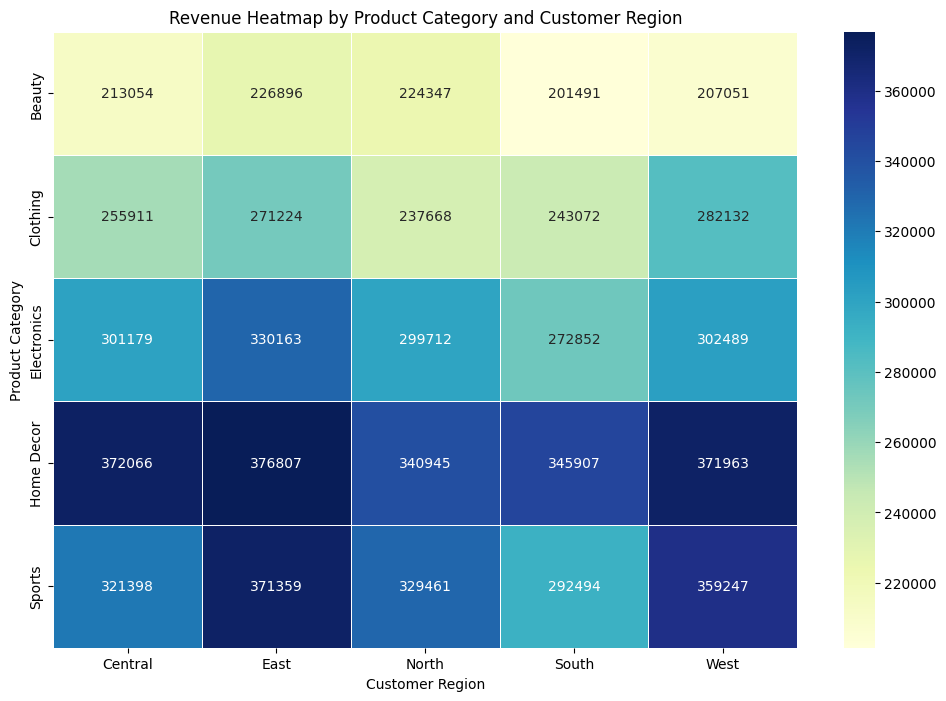

In [ ]:
#What does a heatmap of revenue by category and region look like?

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate revenue by category and region
revenue_by_category_region = df.groupby(['Product Category', 'Customer Region'])['Revenue'].sum().unstack()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(revenue_by_category_region, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)
plt.title('Revenue Heatmap by Product Category and Customer Region')
plt.xlabel('Customer Region')
plt.ylabel('Product Category')
plt.show()


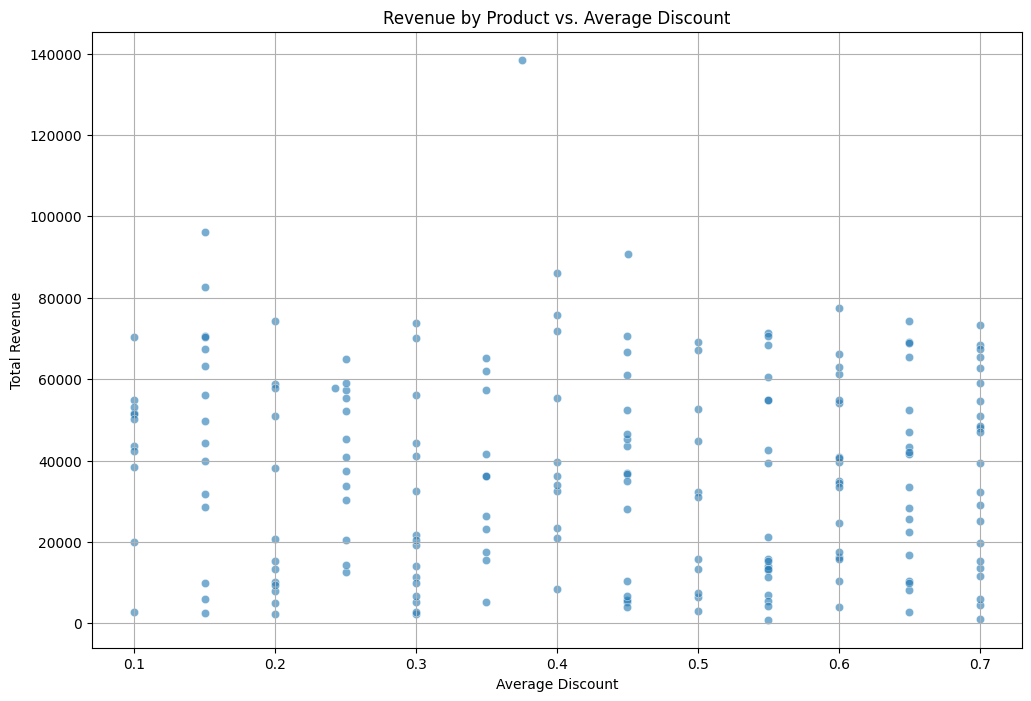

In [ ]:
#Graph between revenue by product Vs Discount

# Aggregate data by product name to get the average discount and total revenue
product_discount_revenue = df.groupby('Product Name').agg(
    AverageDiscount=('Discount', 'mean'),
    TotalRevenue=('Revenue', 'sum')
).reset_index()

# Create a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=product_discount_revenue, x='AverageDiscount', y='TotalRevenue', alpha=0.6)
plt.title('Revenue by Product vs. Average Discount')
plt.xlabel('Average Discount')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()